In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
"""
Implementing Raghav Sir logic
1. 100 taregt labels - {90 write_off = 0 || 10 Write_off = 1} - create a list
1.1 - check best possible lift {1:9 as a skewness}
1.2 - assuming 100 % accurate model
1.3 - responder, gain, decile, lift
Implement same - {1: 8, 1: 7, 1: 6, 1: 5, 1: 4, 1: 3, 1:2, 1: 1}


P = total_num data points label = 0
N = total_data_points
n = N/10 = 10 (for a single decile)
m_i = total_points_with_label_0/n
M_i = total_points upto that decile with label_0
%_rr_i = 100*(m_i/n)
gain_i = 100*(M_i/P)
lift_i = gain_i/10*i
"""

'\nImplementing Raghav Sir logic\n1. 100 taregt labels - {90 write_off = 0 || 10 Write_off = 1} - create a list\n1.1 - check best possible lift {1:9 as a skewness}\n1.2 - assuming 100 % accurate model\n1.3 - responder, gain, decile, lift\nImplement same - {1: 8, 1: 7, 1: 6, 1: 5, 1: 4, 1: 3, 1:2, 1: 1}\n\n\nP = total_num data points label = 0\nN = total_data_points\nn = N/10 = 10 (for a single decile)\nm_i = total_points_with_label_0/n\nM_i = total_points upto that decile with label_0\n%_rr_i = 100*(m_i/n)\ngain_i = 100*(M_i/P)\nlift_i = gain_i/10*i\n'

In [21]:
import random
decile = [i for i in range(1, 11)]
N = 100
P = 90
n = 10
list_1 = [0]*90 + [1]*10
random.shuffle(list_1)

In [22]:
dummy_df = pd.DataFrame({"WriteOff_YN": list_1, 
                         "Predicted_WriteOff_YN": list_1, 
                         })
dummy_df

,WriteOff_YN,Predicted_WriteOff_YN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,1,1


In [23]:
dummy_df.sort_values(by = ["Predicted_WriteOff_YN"], inplace = True)
dummy_df.head(91)

,WriteOff_YN,Predicted_WriteOff_YN
0,0,0
71,0,0
70,0,0
69,0,0
68,0,0
...,...,...
32,0,0
35,0,0
29,0,0
30,0,0


In [24]:
dec = [1]*10+[2]*10+[3]*10+[4]*10+[5]*10+[6]*10+[7]*10+[8]*10+[9]*10+[10]*10

In [25]:
dummy_df["Deciles"] = dec
dummy_df.head(10)
print(dummy_df["Deciles"].value_counts())
print(dummy_df['Deciles'].isnull().sum())

Deciles
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
Name: count, dtype: int64
0


In [26]:
m_1 = len(dummy_df[(dummy_df["Deciles"] == 1) & (dummy_df["WriteOff_YN"] ==0)])
m_2 = len(dummy_df[(dummy_df["Deciles"] == 2) & (dummy_df["WriteOff_YN"] ==0)])
m_3 = len(dummy_df[(dummy_df["Deciles"] == 3) & (dummy_df["WriteOff_YN"] ==0)])
m_4 = len(dummy_df[(dummy_df["Deciles"] == 4) & (dummy_df["WriteOff_YN"] ==0)])
m_5 = len(dummy_df[(dummy_df["Deciles"] == 5) & (dummy_df["WriteOff_YN"] ==0)])
m_6 = len(dummy_df[(dummy_df["Deciles"] == 6) & (dummy_df["WriteOff_YN"] ==0)])
m_7 = len(dummy_df[(dummy_df["Deciles"] == 7) & (dummy_df["WriteOff_YN"] ==0)])
m_8 = len(dummy_df[(dummy_df["Deciles"] == 8) & (dummy_df["WriteOff_YN"] ==0)])
m_9 = len(dummy_df[(dummy_df["Deciles"] == 9) & (dummy_df["WriteOff_YN"] ==0)])
m_10 = len(dummy_df[(dummy_df["Deciles"] == 10) & (dummy_df["WriteOff_YN"] ==0)])

In [27]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [28]:
rr_1 = 100 * m_1/len(dummy_df[dummy_df["Deciles"] == 1])
rr_2 = 100 * m_2/len(dummy_df[dummy_df["Deciles"] == 2])
rr_3 = 100 * m_3/len(dummy_df[dummy_df["Deciles"] == 3])
rr_4 = 100 * m_4/len(dummy_df[dummy_df["Deciles"] == 4])
rr_5 = 100 * m_5/len(dummy_df[dummy_df["Deciles"] == 5])
rr_6 = 100 * m_6/len(dummy_df[dummy_df["Deciles"] == 6])
rr_7 = 100 * m_7/len(dummy_df[dummy_df["Deciles"] == 7])
rr_8 = 100 * m_8/len(dummy_df[dummy_df["Deciles"] == 8])
rr_9 = 100 * m_9/len(dummy_df[dummy_df["Deciles"] == 9])
rr_10 = 100 * m_10/len(dummy_df[dummy_df["Deciles"] == 10])

In [29]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [30]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)

In [31]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]

In [32]:
dummy_decile_new = {"Decile": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            "%_Response_Rate": rr,
            "Cumulative_Gain": cg,
            'Lift': lift}
fin = pd.DataFrame(dummy_decile_new)
fin

,Decile,%_Response_Rate,Cumulative_Gain,Lift
0,1,100.0,11.111111,1.111111
1,2,100.0,22.222222,1.111111
2,3,100.0,33.333333,1.111111
3,4,100.0,44.444444,1.111111
4,5,100.0,55.555556,1.111111
5,6,100.0,66.666667,1.111111
6,7,100.0,77.777778,1.111111
7,8,100.0,88.888889,1.111111
8,9,100.0,100.000000,1.111111
9,10,0.0,100.000000,1.000000


<BarContainer object of 10 artists>

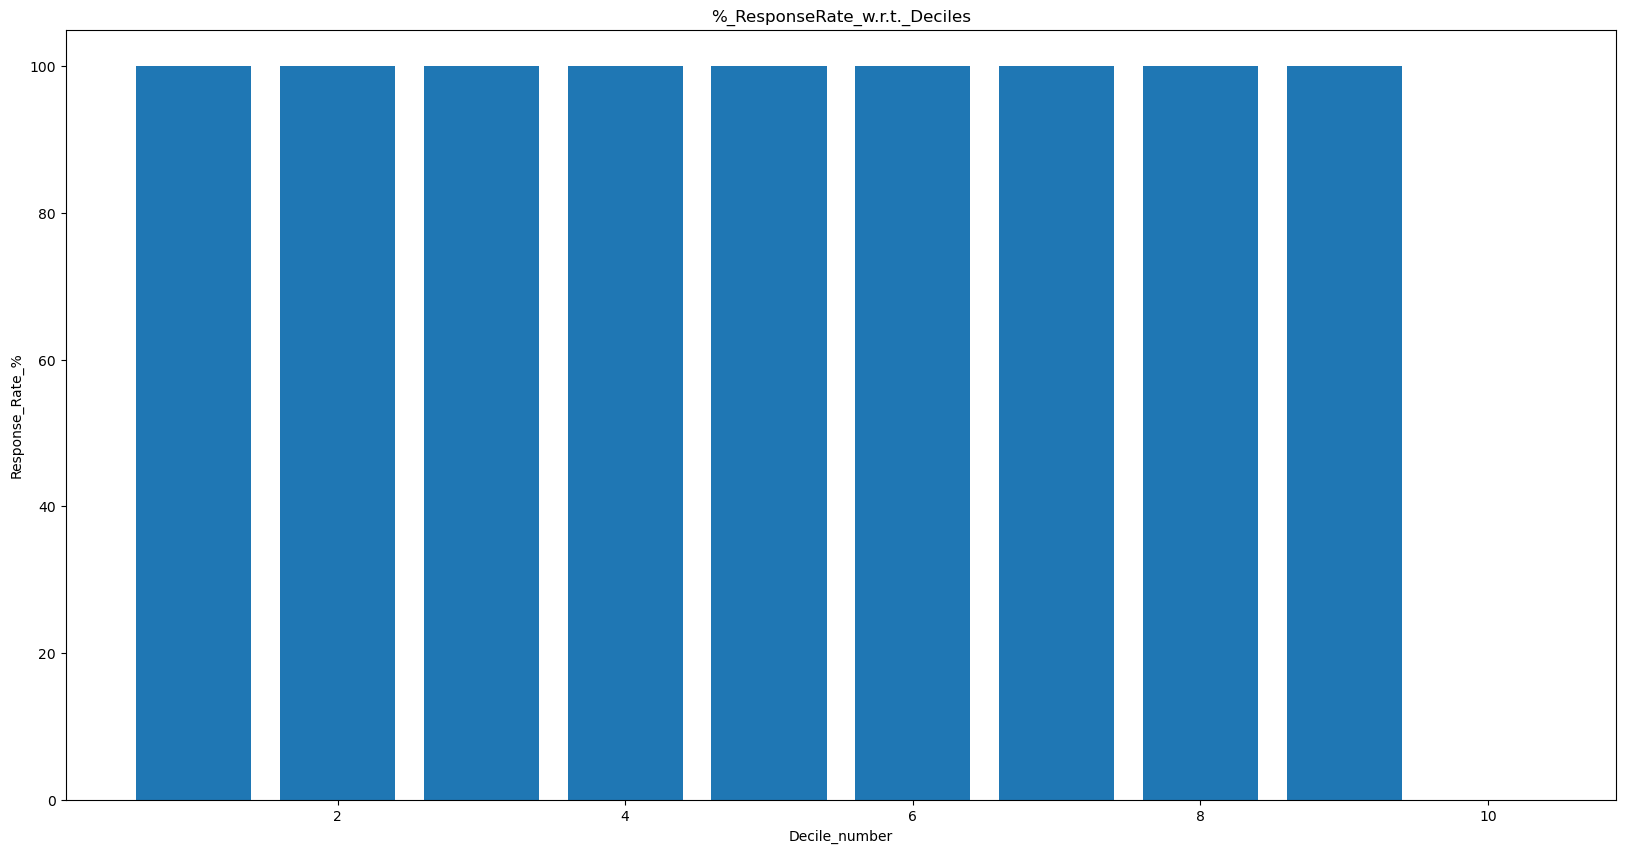

In [33]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_number")
plt.ylabel("Response_Rate_%")
plt.title("%_ResponseRate_w.r.t._Deciles")
plt.bar(fin['Decile'],fin['%_Response_Rate'])

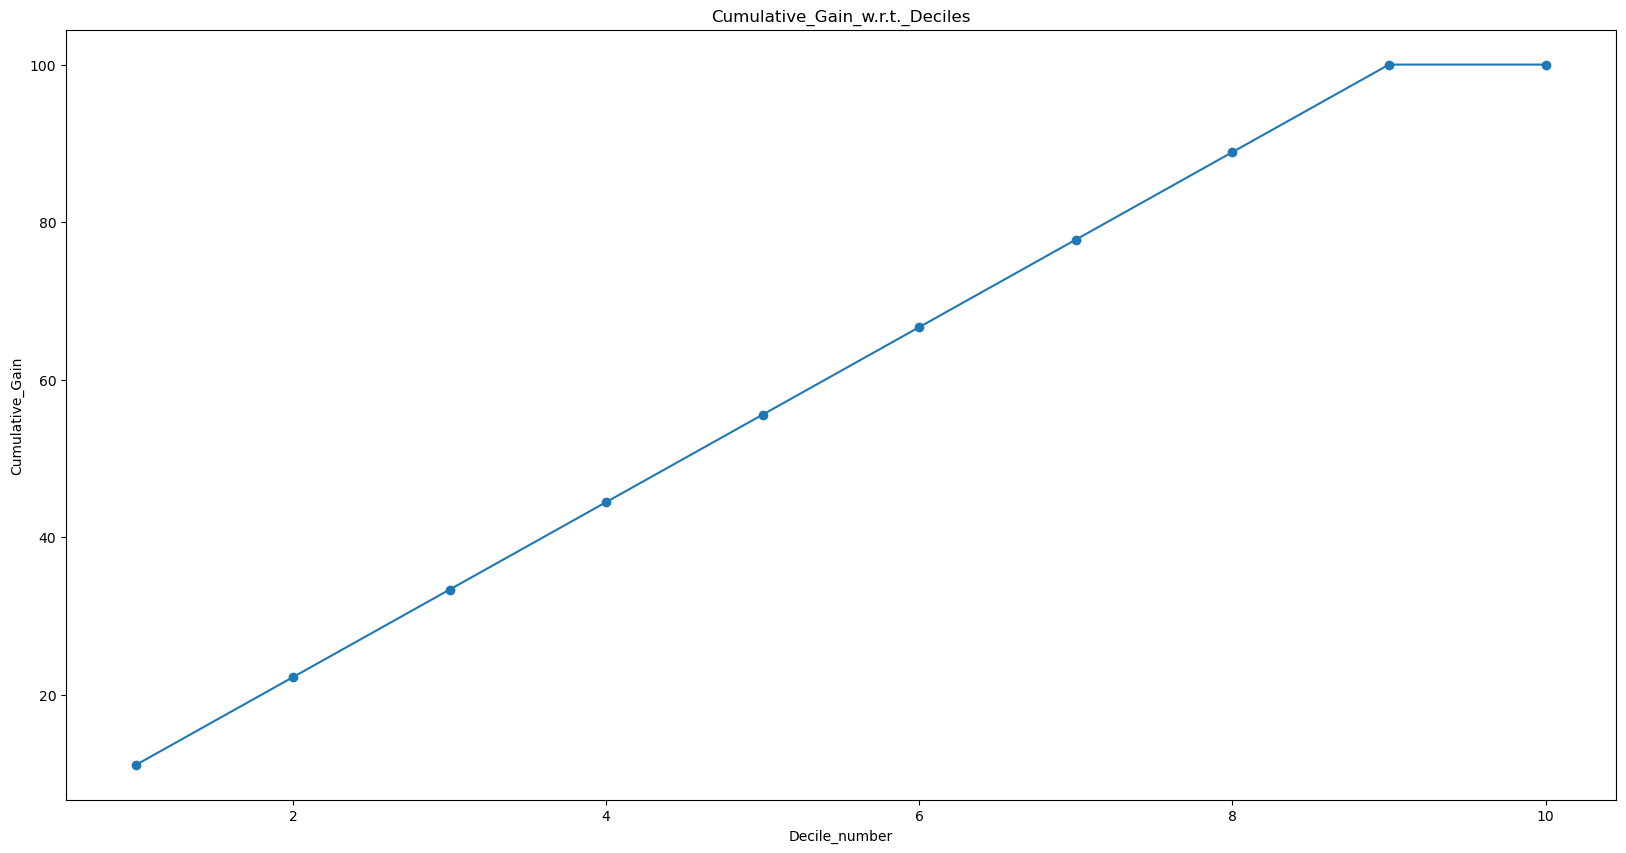

In [34]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_number")
plt.ylabel("Cumulative_Gain")
plt.title("Cumulative_Gain_w.r.t._Deciles")
plt.plot(fin['Decile'],fin['Cumulative_Gain'], marker = 'o')

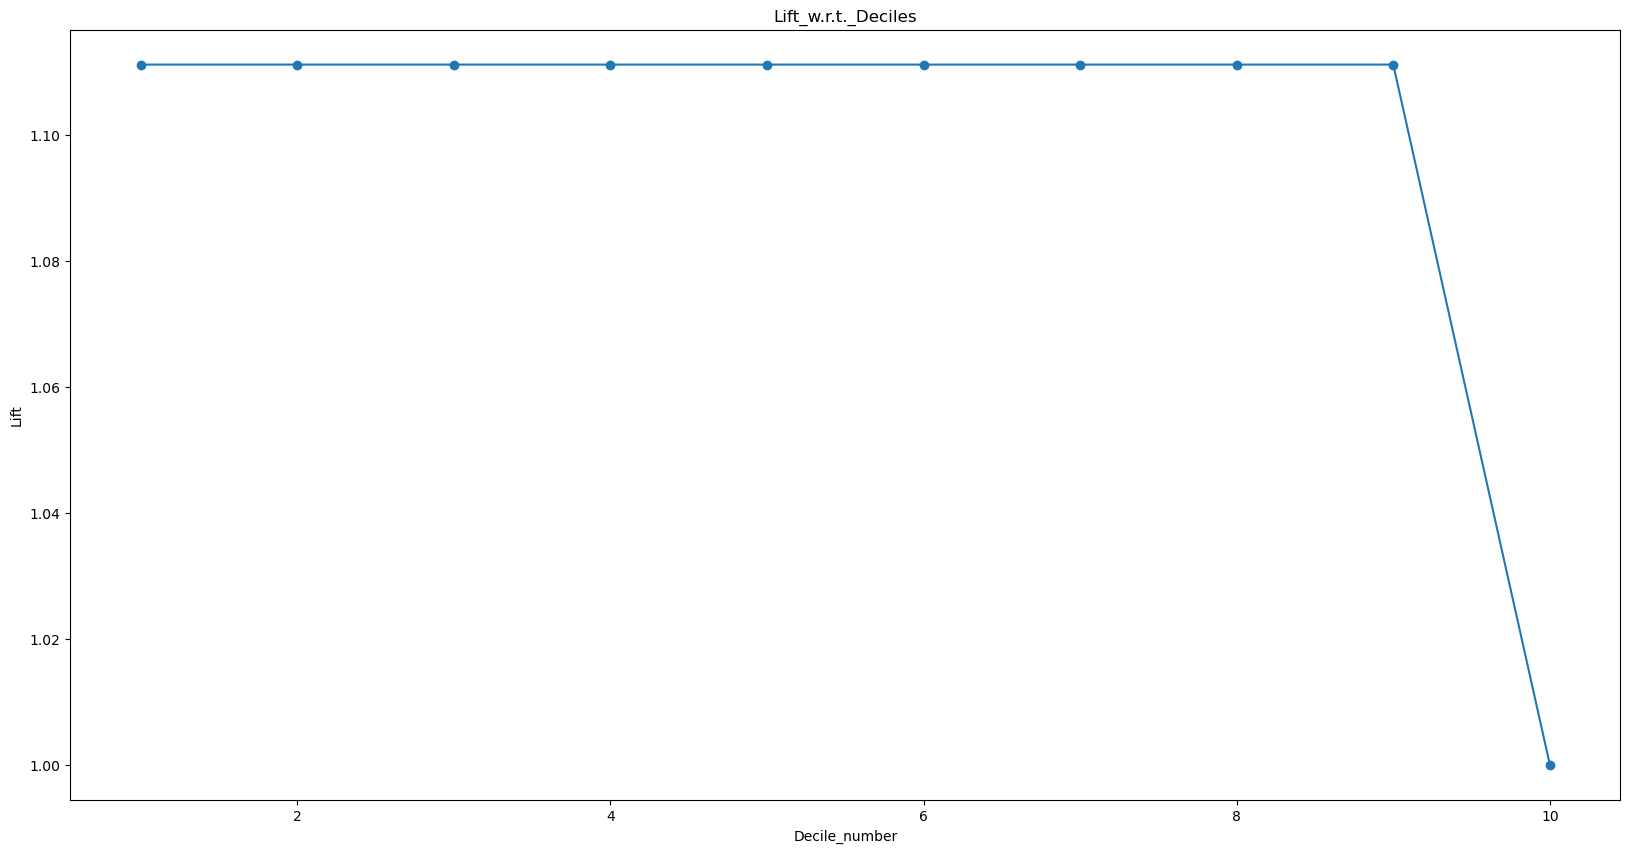

In [35]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_number")
plt.ylabel("Lift")
plt.title("Lift_w.r.t._Deciles")
plt.plot(fin['Decile'],fin['Lift'], marker = 'o')